# Calculating Median Pressures of Raman CO2 calibration analyses from ESI-TEC software log 
- This workbook shows how to extract and calculate median+standard deviation of pressure log data from the ESI-TEC software files corresponding to calibration analyses.
- This data is from Devitre et al. (2021), collected from acqusitions on a high pressure optical cell on the Cornell WITec Alpha300R. 

In [5]:
# Import useful python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import os
import datetime

## Downloading DiadFit locally
- The easiest way to install diad fit is by removing the #. It will install from PyPI
- You only need to do this once on each computer, or run in order to grab an updated version. 

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [6]:
import DiadFit as pf
pf.__version__

'0.0.59'

## Extracting information from the ESI-TEC report files (.docx)
- ESI-Tec software exports a report in word document format, in which the absolute start time of the analysis,serial number of the sensor and other information are stored that we need to access

### First, we identify the report files

In [7]:
path=r"C:\Users\charl\Documents\Instruments and calibrations\UCB_6-7-23"
filetype_reports=['.docx']

report_files=pf.Psensor.get_files(path=path,filetype=filetype_reports)
display(report_files)

['UCB-060723.docx']

### The, we strip the start time of the analysis and the serial number of the sensor from the file

In [8]:
j=0
rep=report_files[j]

start_time,sn_str=pf.Psensor.report_info(path=path,report=rep)

2023-06-07 12:52:48
Serial No. 0141335


## Extracting pressure data from the ESI-TEC pressure log
- ESI-TEC software exports the full pressure log to either excel or csv, which we extract here

### First, we identify the data files 
- These could be excel or csv, we can load either

In [9]:
filetype=['.csv','.xlsx']

pfiles=pf.Psensor.get_files(path=path,filetype=filetype)
display(pfiles)

['Experiment_37C_6-7-23.xlsx', 'UCB-060723.csv', 'UCB-060723.xlsx']

### Now pick a file to start with and read in the data
- Here we will obtain a Date and Time column based on the report start time and a Timestamp column (UNIX time)

In [10]:
i=2 # select filenumber in pfiles
print(pfiles[i])

pdata=pf.Psensor.read_pfiles(path=path,file=pfiles[i],start_time=start_time,sn_name=sn_str)
display(pdata.head())

UCB-060723.xlsx


,Time_sincestart,Pressure / MPa,Temperature / °C,Date and Time,unix_timestamp
0,00:00:00.000000,6.042657,31.906250,2023-06-07 12:52:48.000000,1.686142e+09
1,00:00:03.000258,6.043645,31.905273,2023-06-07 12:52:51.000258,1.686142e+09
2,00:00:05.998594,6.062642,31.905273,2023-06-07 12:52:53.998594,1.686142e+09
3,00:00:08.998589,6.114004,31.904297,2023-06-07 12:52:56.998589,1.686142e+09
4,00:00:11.999413,6.140656,31.905273,2023-06-07 12:52:59.999413,1.686142e+09


### We can plot the pressure data with Date and Time 

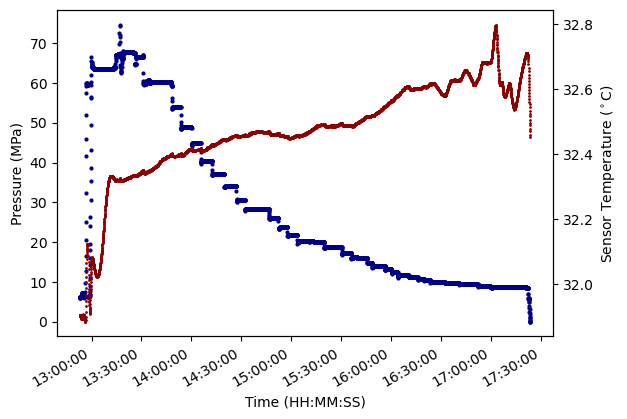

In [11]:
fig, ax = plt.subplots()

ax.plot_date(pdata['Date and Time'],pdata['Pressure / MPa'],'o',markersize=2,color='darkblue',zorder=0)
ax2=ax.twinx()
ax2.plot_date(pdata['Date and Time'],pdata['Temperature / °C'],'o',markersize=1,color='darkred',zorder=0)

ax.set_xlabel(r"Time (HH:MM:SS)")
ax.set_ylabel(r"Pressure (MPa)")
ax2.set_ylabel(r"Sensor Temperature ($^\circ$C)")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gcf().autofmt_xdate()

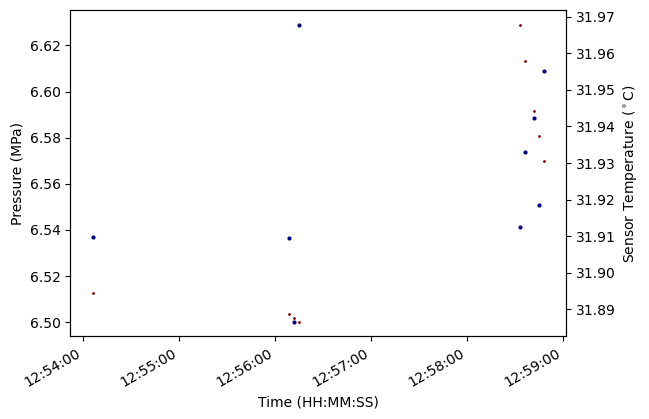

In [12]:
filter=(pdata['Pressure / MPa']<6.7)&(pdata['Pressure / MPa']>6.5)&(pdata['unix_timestamp']>1681175869)
pdata[filter]
fig, ax = plt.subplots()

ax.plot_date(pdata['Date and Time'][filter],pdata['Pressure / MPa'][filter],'o',markersize=2,color='darkblue',zorder=0)
ax2=ax.twinx()
ax2.plot_date(pdata['Date and Time'][filter],pdata['Temperature / °C'][filter],'o',markersize=1,color='darkred',zorder=0)

ax.set_xlabel(r"Time (HH:MM:SS)")
ax.set_ylabel(r"Pressure (MPa)")
ax2.set_ylabel(r"Sensor Temperature ($^\circ$C)")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gcf().autofmt_xdate()

In [13]:
cu_test=pd.read_excel(r"C:\Users\charl\Documents\Instruments and calibrations\FDCA_calibfiles_CORNELL\112820_sensorout.xlsx", sheet_name='Sensor 0830903')
cu_test

,Time,Pressure / MPa,Temperature / °C
0,0.578044,0.101868,20.957031
1,0.578056,0.101962,20.955078
2,0.578067,0.101679,20.955078
3,0.578079,0.101444,20.958008
4,0.578090,0.101208,20.956055
...,...,...,...
42012,1.064281,0.084286,31.304688
42013,1.064293,0.084333,31.303711
42014,1.064304,0.083060,31.301758
42015,1.064316,0.083956,31.303711


Text(0, 0.5, 'Sensor Temperature ($^\\circ$C)')

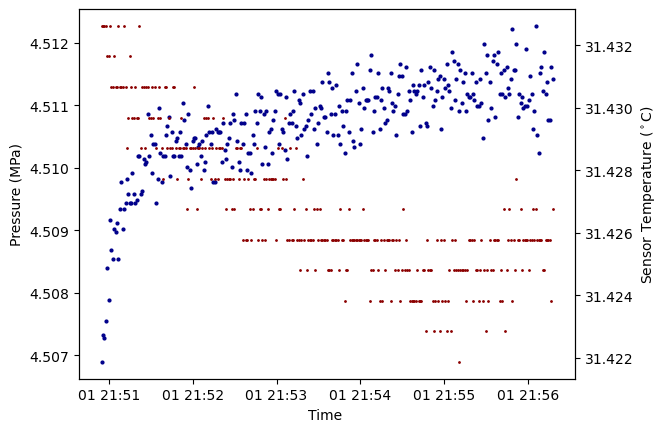

In [14]:
filter=(cu_test['Pressure / MPa']<5)&(cu_test['Pressure / MPa']>4)&(cu_test['Time']>0.91035)&(cu_test['Time']<0.9141)

fig, ax = plt.subplots()

ax.plot_date(cu_test['Time'][filter],cu_test['Pressure / MPa'][filter],'o',markersize=2,color='darkblue',zorder=0)
ax2=ax.twinx()
ax2.plot_date(cu_test['Time'][filter],cu_test['Temperature / °C'][filter],'o',markersize=1,color='darkred',zorder=0)

ax.set_xlabel(r"Time ")
ax.set_ylabel(r"Pressure (MPa)")
ax2.set_ylabel(r"Sensor Temperature ($^\circ$C)")


## Now read in the calibration analysis data 
- This is output xlsx by "Stitch_Outputs_Together.pynb" using DiadFit. 
- You could also simply use a metadata table, but it must have the correct format as output by DiadFit metadata loop functions.

In [16]:
sdata_base = pd.read_excel(r"C:\Users\charl\Documents\Instruments and calibrations\OUTPUT\UCB_6-7-23_FI_fitting_w_sec_phases.xlsx")
sdata_base=sdata_base.drop(columns={'Unnamed: 0','Unnamed: 0.1'}) # drop unnamed column
display(sdata_base.head())

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,104.265563,104.269599,104.261526,0.004036,FDCA-P28-1,104.522847,0.004000,0.004000,1283.107201,0.000000,...,June,7,34.006,10,5,5,"['0h', '0m', '52s']",4:50:27 PM\n,60627,1325.004
1,104.174307,104.179073,104.169542,0.004766,FDCA-P29-1,104.431439,0.004738,0.004738,1283.262920,0.000000,...,June,7,34.046,10,5,5,"['0h', '0m', '51s']",4:58:09 PM\n,61089,1325.004
2,104.068349,104.079617,104.057081,0.011268,FDCA-P30-1,104.325317,0.015497,0.011279,1283.553382,0.009637,...,June,7,34.031,10,5,5,"['0h', '0m', '51s']",5:11:25 PM\n,61885,1325.004
3,104.033129,104.041224,104.025033,0.008095,FDCA-P30-2,104.290017,0.011170,0.008092,1283.590141,0.006829,...,June,7,34.019,10,5,5,"['0h', '0m', '51s']",5:12:41 PM\n,61961,1325.004
4,104.046738,104.054628,104.038849,0.007889,FDCA-P30-3,104.303668,0.011112,0.007885,1283.577940,0.006022,...,June,7,34.028,10,5,5,"['0h', '0m', '51s']",5:14:06 PM\n,62046,1325.004


# Calculate the datetime, unix timestamp and duration of each analysis
- Here we can specify a time offset between the raman computer and the pressure recording computer
- For this dataset, the raman computer was about ~4 minutes ahead of the pressure recording computer. If we specify df=sdata,raman_cpu_offset='ahead',offset_hms=[0,5,0] as arguments of the function, we will immediately at the end that the standard deviations of the pressure medians are much lower. If instead we said raman_cpu_offset='none', we can see at the end that the standard deviations are large for some samples.

In [18]:
sdata=pf.Psensor.add_datetime_and_duration_cols(df=sdata_base,raman_cpu_offset='ahead',offset_hms=[0,0,0])
sdata.head()

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Date and Time,Date and Time - offset,unix_timestamp,duration_s
0,104.265563,104.269599,104.261526,0.004036,FDCA-P28-1,104.522847,0.004000,0.004000,1283.107201,0.000000,...,5,5,"['0h', '0m', '52s']",4:50:27 PM,60627,1325.004,2023-06-07 16:50:27,2023-06-07 16:50:27,1.686157e+09,52.0
1,104.174307,104.179073,104.169542,0.004766,FDCA-P29-1,104.431439,0.004738,0.004738,1283.262920,0.000000,...,5,5,"['0h', '0m', '51s']",4:58:09 PM,61089,1325.004,2023-06-07 16:58:09,2023-06-07 16:58:09,1.686157e+09,51.0
2,104.068349,104.079617,104.057081,0.011268,FDCA-P30-1,104.325317,0.015497,0.011279,1283.553382,0.009637,...,5,5,"['0h', '0m', '51s']",5:11:25 PM,61885,1325.004,2023-06-07 17:11:25,2023-06-07 17:11:25,1.686158e+09,51.0
3,104.033129,104.041224,104.025033,0.008095,FDCA-P30-2,104.290017,0.011170,0.008092,1283.590141,0.006829,...,5,5,"['0h', '0m', '51s']",5:12:41 PM,61961,1325.004,2023-06-07 17:12:41,2023-06-07 17:12:41,1.686158e+09,51.0
4,104.046738,104.054628,104.038849,0.007889,FDCA-P30-3,104.303668,0.011112,0.007885,1283.577940,0.006022,...,5,5,"['0h', '0m', '51s']",5:14:06 PM,62046,1325.004,2023-06-07 17:14:06,2023-06-07 17:14:06,1.686158e+09,51.0


# Calculate the median pressure and median absolute deviation for each analysis
- This portion calculates the median pressures for each analysis based on the timestamps, and then merges the results back in with the analysis dataset
- Make sure that the time on each acquisition computer is the same or if you know the offset correct the time in one of the datasets

## Calculate median pressure and median absolute deviation for each analysis

In [19]:
# Calculate median pressure intra-analysis and 1 median absolute deviation
p_medians=pf.Psensor.get_p_medians(pdata=pdata,sdata=sdata)
display(p_medians.head())

,filename_x,start_time_P,end_time_P,median_pressure,mad_pressure,median_temp,mad_temp
0,FDCA-P28-1,2023-06-07 16:50:26.910976000,2023-06-07 16:51:18.910976000,9.518221,0.000344,32.619629,0.002496
1,FDCA-P29-1,2023-06-07 16:58:08.904004096,2023-06-07 16:58:59.904004096,9.120649,0.000397,32.683594,0.000952
2,FDCA-P30-1,2023-06-07 17:11:23.898454784,2023-06-07 17:12:14.898454784,8.680050,0.000349,32.599609,0.009360
3,FDCA-P30-2,2023-06-07 17:12:41.898341888,2023-06-07 17:13:32.898341888,8.682452,0.000371,32.550293,0.005046
4,FDCA-P30-3,2023-06-07 17:14:05.897166848,2023-06-07 17:14:56.897166848,8.679035,0.000693,32.545898,0.003298


## Merge results into analysis dataset and plot
- Here, check that the standard deviations are small, plot can help ID issues like mismatching computer time
- In this dataset, for instance, the CPU time on the computer where the Raman analyses were made and the pressure recording laptop was slightly different (by 4 minutes), in a case like this, you'll want to adjust the time of the analyses, you can go back and do this then recalculate the medians.

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,Date and Time,Date and Time - offset,unix_timestamp,duration_s,start_time_P,end_time_P,median_pressure,mad_pressure,median_temp,mad_temp
5,105.339288,105.342918,105.335657,0.003631,FDCA-P1-1,105.593247,0.004914,0.003590,1281.208360,0.003096,...,2023-06-07 13:27:21,2023-06-07 13:27:21,1.686144e+09,52.0,2023-06-07 13:27:20.974610176,2023-06-07 13:28:12.974610176,66.463879,0.000959,32.336914,0.001013
6,105.343871,105.347321,105.340420,0.003450,FDCA-P1-2_CRR_DiadFit,105.597889,0.004678,0.003407,1281.204059,0.002916,...,2023-06-07 13:28:20,2023-06-07 13:28:20,1.686144e+09,51.0,2023-06-07 13:28:20.970629888,2023-06-07 13:29:11.970629888,66.460425,0.001139,32.340820,0.000777
7,105.342879,105.346483,105.339274,0.003604,FDCA-P1-3,105.596941,0.004878,0.003564,1281.205792,0.003072,...,2023-06-07 13:29:18,2023-06-07 13:29:18,1.686145e+09,51.0,2023-06-07 13:29:17.970551040,2023-06-07 13:30:08.970551040,66.455936,0.001092,32.343750,0.001061
22,105.281586,105.284978,105.278193,0.003393,FDCA-P2-1,105.536177,0.004601,0.003348,1281.291375,0.002860,...,2023-06-07 13:43:44,2023-06-07 13:43:44,1.686145e+09,52.0,2023-06-07 13:43:44.974167040,2023-06-07 13:44:36.974167040,60.179294,0.001203,32.389160,0.001302
23,105.279822,105.283322,105.276322,0.003500,FDCA-P2-2_CRR_DiadFit,105.534458,0.004741,0.003458,1281.291815,0.002970,...,2023-06-07 13:44:50,2023-06-07 13:44:50,1.686145e+09,51.0,2023-06-07 13:44:50.970295808,2023-06-07 13:45:41.970295808,60.178839,0.001778,32.392578,0.000977


(19515.518993055557, 19515.73895833333)

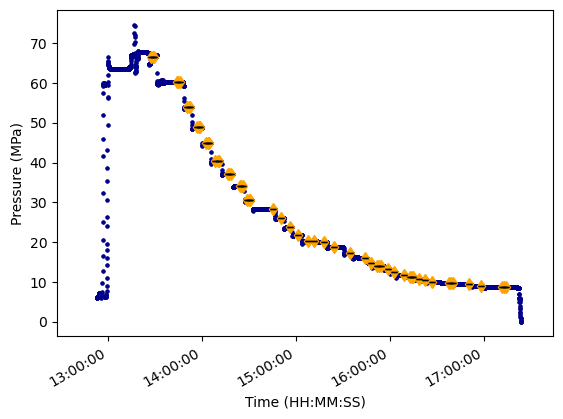

In [20]:
# Merge this into the OG spectal dataframe
merged_data=pd.merge(left=sdata,right=p_medians,how='outer',left_on='filename_x',right_on='filename_x')
# sort the dataframe by date and time
merged_data.sort_values(by='Date and Time',inplace=True)

display(merged_data.head())

show_temp=False # If you want to show the sensor temperature averages as well, change to True

fig, ax = plt.subplots()

ax.plot_date(pdata['Date and Time'],pdata['Pressure / MPa'],'o',markersize=2,color='darkblue',zorder=1)

ax.plot_date(pdata['Date and Time'],pdata['Pressure / MPa'],'o',markersize=2,color='darkblue',zorder=1)
ax.errorbar(merged_data['Date and Time - offset'],merged_data['median_pressure'], yerr=merged_data['mad_pressure'], fmt='d',color='orange',mfc='orange', ecolor='black', capsize=2,barsabove=True,zorder=2)

if show_temp==True:
    
    ax2=ax.twinx()

    ax2.plot_date(pdata['Date and Time'],pdata['Temperature / °C'],'o',markersize=1,color='darkred',zorder=-1)
    ax2.errorbar(merged_data['Date and Time - offset'],merged_data['median_temp'], yerr=merged_data['mad_temp'], fmt='s',color='orange',mfc='orange', ecolor='black', capsize=2,barsabove=True,zorder=0)
    ax2.set_ylabel(r"Sensor Temperature ($^\circ$C)")

ax.set_xlabel(r"Time (HH:MM:SS)")
ax.set_ylabel(r"Pressure (MPa)")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gcf().autofmt_xdate()
plt.xlim(min(merged_data['Date and Time - offset'])-datetime.timedelta(hours=1),max(merged_data['Date and Time - offset'])+datetime.timedelta(hours=0.5))


## Export merged data to excel or clipboard

In [21]:
merged_data['filename_nocrr'] = merged_data['filename_x'].str.split('_', n=1).str[0]
#Export the updated dataframe to excel
merged_data.to_excel(path+'/'+'merged_dataframe.xlsx')
#Export the updated dataframe to clipboard
merged_data.to_clipboard(excel=True)

## FERMI SPLIT vs P

In [22]:
#creates a column with a new column that splits the filename to sample name (FDCA-P1-1 becomes FDCA-P1)
df=merged_data.copy()
df['filename_split'] = df['filename_x'].str.split('-', n=2).str[:2].str.join('-')
df.head()

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,unix_timestamp,duration_s,start_time_P,end_time_P,median_pressure,mad_pressure,median_temp,mad_temp,filename_nocrr,filename_split
5,105.339288,105.342918,105.335657,0.003631,FDCA-P1-1,105.593247,0.004914,0.003590,1281.208360,0.003096,...,1.686144e+09,52.0,2023-06-07 13:27:20.974610176,2023-06-07 13:28:12.974610176,66.463879,0.000959,32.336914,0.001013,FDCA-P1-1,FDCA-P1
6,105.343871,105.347321,105.340420,0.003450,FDCA-P1-2_CRR_DiadFit,105.597889,0.004678,0.003407,1281.204059,0.002916,...,1.686144e+09,51.0,2023-06-07 13:28:20.970629888,2023-06-07 13:29:11.970629888,66.460425,0.001139,32.340820,0.000777,FDCA-P1-2,FDCA-P1
7,105.342879,105.346483,105.339274,0.003604,FDCA-P1-3,105.596941,0.004878,0.003564,1281.205792,0.003072,...,1.686145e+09,51.0,2023-06-07 13:29:17.970551040,2023-06-07 13:30:08.970551040,66.455936,0.001092,32.343750,0.001061,FDCA-P1-3,FDCA-P1
22,105.281586,105.284978,105.278193,0.003393,FDCA-P2-1,105.536177,0.004601,0.003348,1281.291375,0.002860,...,1.686145e+09,52.0,2023-06-07 13:43:44.974167040,2023-06-07 13:44:36.974167040,60.179294,0.001203,32.389160,0.001302,FDCA-P2-1,FDCA-P2
23,105.279822,105.283322,105.276322,0.003500,FDCA-P2-2_CRR_DiadFit,105.534458,0.004741,0.003458,1281.291815,0.002970,...,1.686145e+09,51.0,2023-06-07 13:44:50.970295808,2023-06-07 13:45:41.970295808,60.178839,0.001778,32.392578,0.000977,FDCA-P2-2,FDCA-P2


<ErrorbarContainer object of 3 artists>

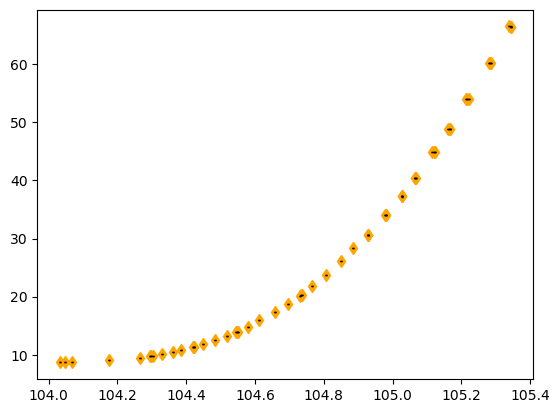

In [23]:
plt.errorbar(y=merged_data['median_pressure'],x=merged_data['Corrected_Splitting'], yerr=merged_data['mad_pressure'], fmt='d',color='orange',mfc='orange', ecolor='black', capsize=1,barsabove=True,zorder=2)
